# **LAB 3**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder as lb
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor as DTR
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
import seaborn as sns

## Problem 1

### 1. Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also identify the useful columns and drop the unnecessary ones

In [20]:
titan = pd.read_csv("/content/drive/MyDrive/PRML/Lab3/titanic.csv")
titanic_dataset = pd.DataFrame(titan,columns = titan.columns)
 
titanic_dataset_new = titanic_dataset.copy()
titanic_dataset_new=titanic_dataset_new.drop(labels=["PassengerId","Name","Ticket","Cabin"],axis=1)
titanic_dataset_new

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,male,22.0,7.2500,S,0
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,1
888,3,female,NaN,23.4500,S,0
889,1,male,26.0,30.0000,C,1


#### Preprocessing the dataset

In [60]:
X = titanic_dataset_new.copy()
lb_new = lb()
X = X.drop(X[(X["Age"] < 1)].index)
X =X.dropna()
X["Age"] = X["Age"].astype(int)
# X["Sex"] = lb.fit_transform(X["Sex"])
Y = X["Survived"]
# X = X.drop(labels = ["Survived"],axis = 1)

X["Sex"] = lb_new.fit_transform(X["Sex"])
X["Embarked"] = lb_new.fit_transform(X["Embarked"])

X = X.set_index(np.arange(len(X)))
X

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,1,22,7.2500,2,0
1,1,0,38,71.2833,0,1
2,3,0,26,7.9250,2,1
3,1,0,35,53.1000,2,1
4,3,1,35,8.0500,2,0
...,...,...,...,...,...,...
700,3,0,39,29.1250,1,0
701,2,1,27,13.0000,2,0
702,1,0,19,30.0000,2,1
703,1,1,26,30.0000,0,1


#### Visualization of data


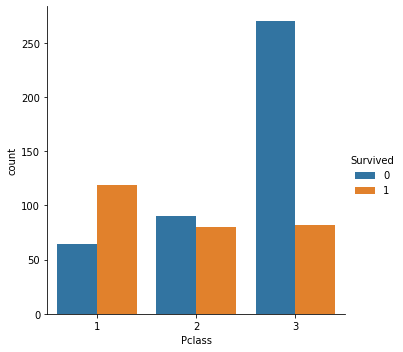

In [64]:
s = sns.catplot(x="Pclass",hue="Survived",kind="count",data = X,legend=(True))

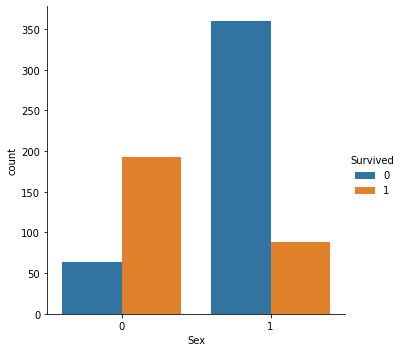

In [65]:
sns.catplot(x="Sex",hue="Survived",kind="count",data = X,legend=(True))

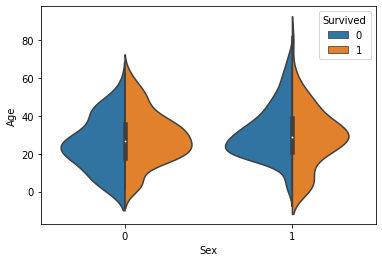

In [67]:
sns.violinplot(x="Sex",y = "Age",hue="Survived",data = X,split = True)

#### Splitting of data

In [69]:
X_train,X_test,Y_train,Y_test= tts(X,Y,test_size = 0.2,shuffle=True)
